In [9]:
# Standard python packages
import os
import sys
from pathlib import Path

# Other package imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [168]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pathlib import Path
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [98]:
data_folder = Path("../data/processed")
income_df = pd.read_csv(data_folder / "X19_INCOME.csv", index_col="GEOID")
income_total = income_df["PER CAPITA INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS): Total: Total population -- (Estimate)"]

In [109]:
categories = ["EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Bachelor's degree: Population 25 years and over -- (Estimate)", "EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Master's degree: Population 25 years and over -- (Estimate)", "EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Doctorate degree: Population 25 years and over -- (Estimate)"]

edu_df = pd.read_csv(data_folder / "X15_EDUCATIONAL_ATTAINMENT.csv", index_col="GEOID")
edu_deg = edu_df[categories].sum(axis=1)
income_edu = pd.concat([income_total, edu_deg], axis=1)
income_edu.columns = ["Per captia income", "Bachelor's or higher"]
income_edu

,Per captia income,Bachelor's or higher
GEOID,,
15000US060014001001,106897.0000,1578
15000US060014002001,87674.0000,602
15000US060014002002,71710.0000,515
15000US060014003001,94761.0000,772
15000US060014003002,55345.0000,757
15000US060014003003,40481.0000,287
15000US060014003004,58788.0000,717
15000US060014004001,68147.0000,892
15000US060014004002,52673.0000,521


In [177]:
income_edu_small = income_edu[:]
X = income_edu_small["Per captia income"]
y = income_edu_small["Bachelor's or higher"]
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
print(len(X_train))

12728


ValueError: x and y must be the same size

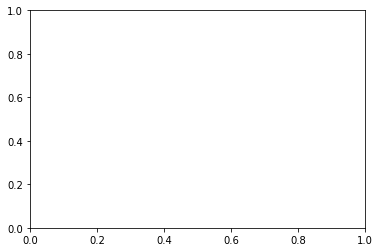

In [153]:
plt.scatter(X, y)

In [ ]:
model = XGBClassifier(verbose=True)
model.fit(X_train[:, np.newaxis], y_train)

In [181]:
y_pred = model.predict(X_test[:, np.newaxis])
print(y_pred)

[ 115   23  420 ...  110 1503  641]


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished


In [182]:
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 127935.64003189793


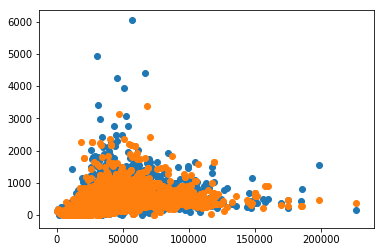

In [190]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred)